# Árvores de Decisão - Aprofundando em modelos de Machine Learning

## Entendendo a classificação

* Escolher um atributo que melhor divida os dados para iniciar as divisões dos nodes
* Índice de Gini (Classificação)
  * Calcular o grau de impureza
  * (0) Puro - (1) Impuro
* RSS - Soma dos Quadrados dos resíduos (Regressão)

## Importando os dados

In [2]:
import pandas as pd

In [1]:
CSV_URL = 'https://caelum-online-public.s3.amazonaws.com/1799-xgboost/02/creditcard.csv'

In [4]:
df_transacoes = pd.read_csv(CSV_URL)
df_transacoes.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## EDA

In [7]:
df_transacoes['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [19]:
X = df_transacoes.drop('Class', axis=1).values
Y = df_transacoes['Class'].values

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
def generate_train_test(x_data, y_data):
  validator = StratifiedShuffleSplit(n_splits=1,
                                  test_size=.1,
                                  random_state=0)
  for train_id, test_id in validator.split(X, Y):
    x_train, x_test, y_train, y_test = X[train_id], X[test_id], Y[train_id], Y[test_id]
  return x_train, x_test, y_train, y_test

In [42]:
x_train, x_test, y_train, y_test = generate_train_test(X, Y)

## Modeling

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [70]:
def generate_predictions(model, x_train, x_test, y_train):
  model.fit(x_train, y_train)
  return model.predict(x_test)

In [49]:
def see_tree(tree, fontsize=10, figsize=(10, 20)):
  plt.figure(figsize=figsize)
  plot_tree(tree,
            filled=True,
            class_names=['Fraude', 'Lícito'],
            feature_names=df_transacoes.columns,
            fontsize=fontsize);

In [45]:
model_tree = DecisionTreeClassifier()
y_hat = generate_predictions(model_tree, x_train, x_test, y_train, y_test)

Accr train:  1.0
Accr test:  0.9991924440855307


In [51]:
see_tree(model_tree, figsize=(200, 100))

## Avaliando

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
def model_validate(y_test, y_pred):
  print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
  print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
  print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test)).plot()

Accuracy: 99.92%
Precision: 79.55%
Recall: 71.43%


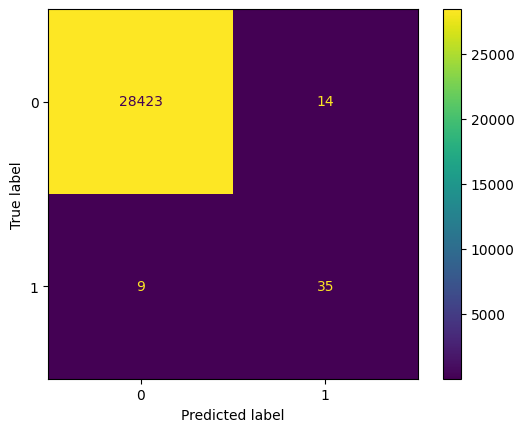

In [69]:
model_validate(y_test, y_hat)

## Modeling - Hyperparams tunning

Accuracy: 99.95%
Precision: 73.47%
Recall: 94.74%


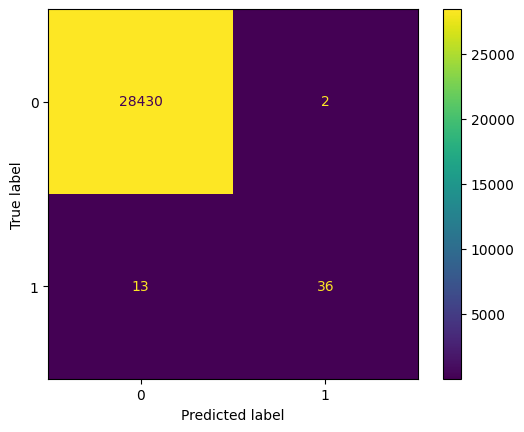

In [75]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=0)
y_hat = generate_predictions(model_tree, x_train, x_test, y_train)
model_validate(y_hat, y_test)

Accuracy: 99.94%
Precision: 71.43%
Recall: 92.11%


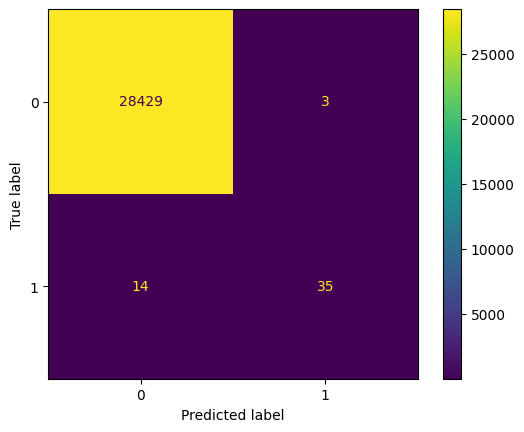

In [76]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
y_hat = generate_predictions(model_tree, x_train, x_test, y_train)
model_validate(y_hat, y_test)

## Modeling - Bagging

In [77]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 99.95%
Precision: 94.87%
Recall: 75.51%


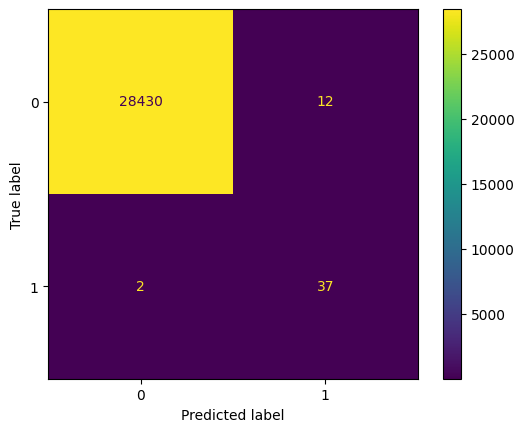

In [79]:
model_rforest = RandomForestClassifier(random_state=0,
                                       n_estimators=100,
                                       max_depth=10)
y_hat = generate_predictions(model_rforest, x_train, x_test, y_train)
model_validate(y_test, y_hat)

## Modeling - Boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(random_state=0,
                               n_estimators=100)
y_hat = generate_predictions(model_ada, x_train, x_test, y_train)
model_validate(y_test, y_hat)